In [16]:
%matplotlib inline
import pymc3 as pm
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
figsize(12.5, 4)
import pandas as pd
import arviz as az


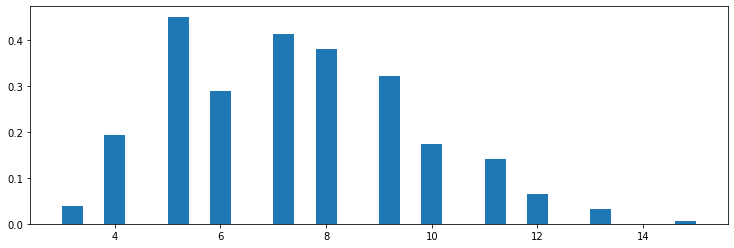

In [2]:
wipObservations = pd.read_csv("/Users/robertk/Documents/GitHub/evolveNotebooks/Skeyos/InProgressObservations.csv")
wipObservations.head()

observations_wip = wipObservations['SP_count']
plt.hist( observations_wip, bins=30, density=True, histtype="stepfilled")
plt.title ='ffdf'
plt.show()


In [39]:
# Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model:

    mu1 = pm.Uniform("mu1", 0, 10)

    
    
    
    
    

#    avgCycleTime = pm.Poisson("avgCycleTime", 1/observations_avgCycleTime.mean(), observed=observations_wip)
    wip = pm.Poisson("wip", mu=mu1)
   
    
    obs_wip = pm.Poisson("obs_wip", mu=mu1, observed=observations_wip)
    


    # To be explained in chapter 3.
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step)
    burned_trace=trace[1000:]
    


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [wip]
>Metropolis: [mu1]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:05<00:00, 7123.93draws/s]
The number of effective samples is smaller than 10% for some parameters.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1235d39e8>,
      dtype=object)

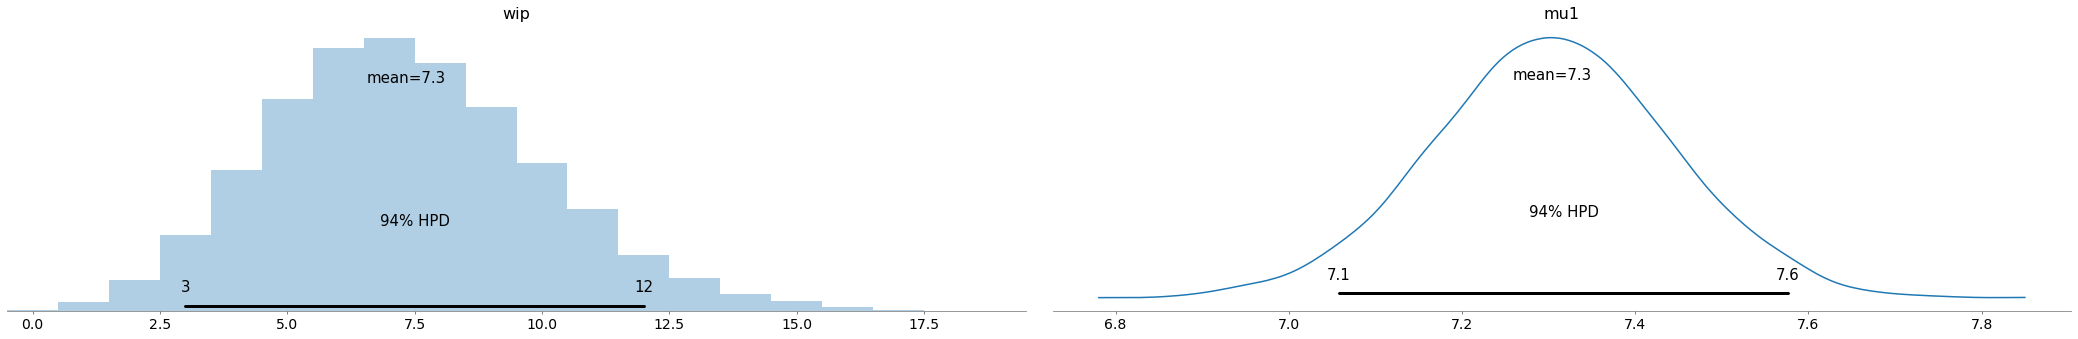

In [43]:
pm.plot_posterior(trace)

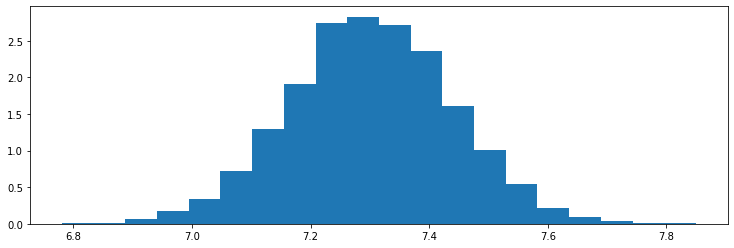

In [41]:
#fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
#az.plot_posterior(burned_trace['n1'], figsize=(8, 14));
_ = plt.hist(burned_trace['mu1'], bins=20, density=True, histtype="stepfilled")
# plt.show()
# _ = plt.hist(burned_trace['p1'], bins=20, density=True, histtype="stepfilled")

Model wip mean 7.322861111111111
Data wip mean 7.300771208226221


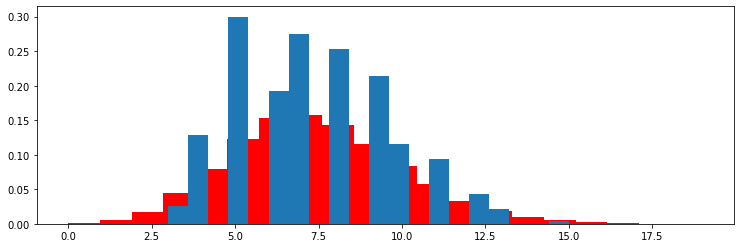

In [48]:
_ = plt.hist(burned_trace["wip"], bins=20, density=True, histtype="stepfilled", color='red')
_ = plt.hist(observations_wip, bins=20, density=True, histtype="stepfilled")

print('Model wip mean', burned_trace["wip"].mean())
print('Data wip mean', observations_wip.mean())


No handles with labels found to put in legend.


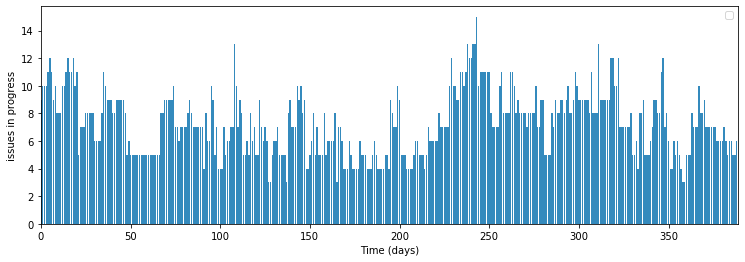

In [52]:
data = observations_wip
plt.bar(np.arange(len(data)), data, color="#348ABD")
#plt.bar(tau-1, data[tau - 1], color="r", label="user behaviour changed")
plt.xlabel("Time (days)")
plt.ylabel("issues in progress")
#plt.title("Artificial WIP dataset")
plt.xlim(0, len(data))
plt.legend();
plt.show()

No handles with labels found to put in legend.


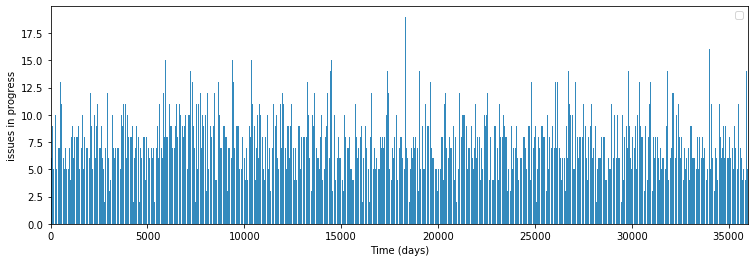

In [53]:
data = burned_trace["wip"]
plt.bar(np.arange(len(data)), data, color="#348ABD")
#plt.bar(tau-1, data[tau - 1], color="r", label="user behaviour changed")
plt.xlabel("Time (days)")
plt.ylabel("issues in progress")
#plt.title("Artificial WIP dataset")
plt.xlim(0, len(data))
plt.legend();
plt.show()

In [57]:
print(burned_trace[0])

{'mu1_interval__': -0.5082198055205037, 'sigma1_interval__': -1.9905222168144823, 'mu2_interval__': -0.7758485088624651, 'sigma2_interval__': 1.8003185654541538, 'lam1_interval__': -1.6818358845228187, 'avgWIP_lowerbound__': 2.065158433673686, 'avgCycleTime_log__': 0.3023486583105644, 'mu1': 7.512218746090591, 'sigma1': 2.4040325083402196, 'mu2': 6.304306328146295, 'sigma2': 17.16375418875684, 'lam1': 0.1568525205268655, 'avgWIP': 7.886547293339497, 'avgCycleTime': 1.3530328906417186, 'troughput': 5.82879200342207}


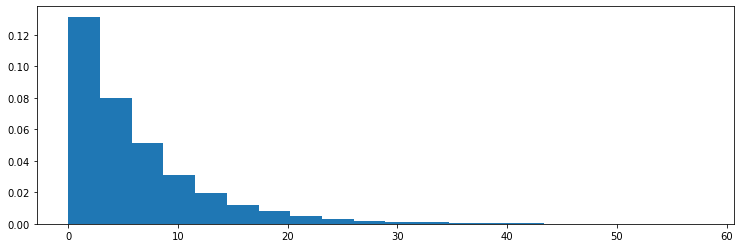

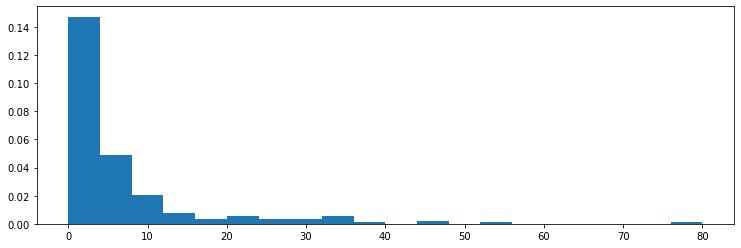

Model avgCycleTime mean 6.157296072019612
Data avgCycleTime mean 6.12987012987013


In [59]:
_ = plt.hist(burned_trace["avgCycleTime"], bins=20, density=True, histtype="stepfilled")
_ = plt.show()
_ = plt.hist(observations_avgCycleTime, bins=20, density=True, histtype="stepfilled")
_ = plt.show()
print('Model avgCycleTime mean', burned_trace["avgCycleTime"].mean())
print('Data avgCycleTime mean', observations_avgCycleTime.mean())

In [60]:
trace[0]

{'mu1_interval__': -0.5463950322801349,
 'sigma1_interval__': -2.060477726610806,
 'mu2_interval__': -2.1219446743134864,
 'sigma2_interval__': -2.191204537149585,
 'lam1_interval__': -1.5089948852531179,
 'avgWIP_lowerbound__': 2.2930490766615828,
 'avgCycleTime_log__': 2.0917271454300264,
 'mu1': 7.334023855562172,
 'sigma1': 2.259958779299774,
 'mu2': 2.139642803288319,
 'sigma2': 2.0108621958735995,
 'lam1': 0.18108779887620666,
 'avgWIP': 9.905093072879414,
 'avgCycleTime': 8.098891054306304,
 'troughput': 1.2230184362848942}

In [61]:
burned_trace[0]

{'mu1_interval__': -0.5082198055205037,
 'sigma1_interval__': -1.9905222168144823,
 'mu2_interval__': -0.7758485088624651,
 'sigma2_interval__': 1.8003185654541538,
 'lam1_interval__': -1.6818358845228187,
 'avgWIP_lowerbound__': 2.065158433673686,
 'avgCycleTime_log__': 0.3023486583105644,
 'mu1': 7.512218746090591,
 'sigma1': 2.4040325083402196,
 'mu2': 6.304306328146295,
 'sigma2': 17.16375418875684,
 'lam1': 0.1568525205268655,
 'avgWIP': 7.886547293339497,
 'avgCycleTime': 1.3530328906417186,
 'troughput': 5.82879200342207}

ValueError: too many values to unpack (expected 1)

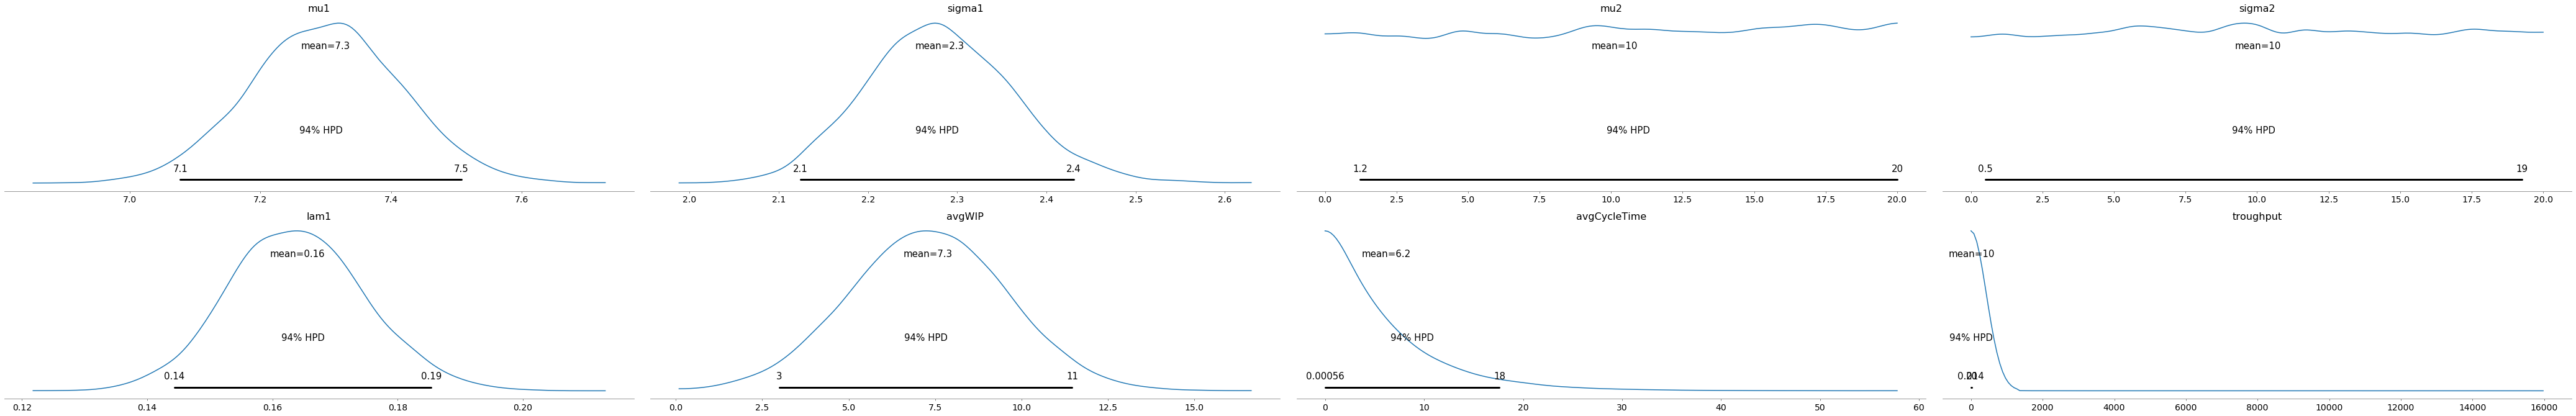

In [64]:
ax, = pm.plots.plot_posterior(trace)
ax.set_xlim(-5, 20)